In [14]:
import pickle as pkl
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

complete = Path('/rds/general/user/al3615/home/RNN_for_movie_gross_prediction/complete10000_films_and_synopsis.pickle')
data = pkl.load(open(complete,'rb'))
def data_split(data, valid_fraction=0.2, test_fraction=0.2, train_fraction=None):
    """
    Returns `data` split into (test_set, validation_set, training_set) where the 
    """
    
    if train_fraction is None:
        train_fraction = 1 - test_fraction - valid_fraction
    rng = np.random.default_rng()
    rng.shuffle(data)
    len_d = len(data)
    test_idx = int(len_d*test_fraction)
    valid_idx = test_idx + int(len_d*valid_fraction)
    # Just checking method is consistent
    train_idx = valid_idx + int(len_d*train_fraction)
    assert train_idx == len_d
    return (data[:test_idx], data[test_idx:valid_idx], data[valid_idx:])
    

2000 2000 6000
81.0 3989.0 3994.0


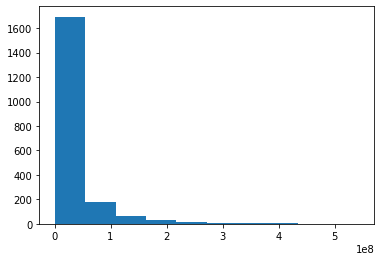

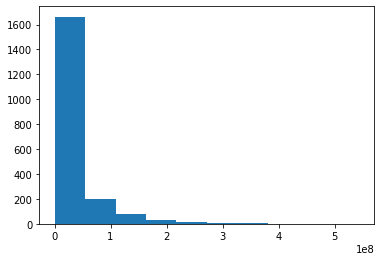

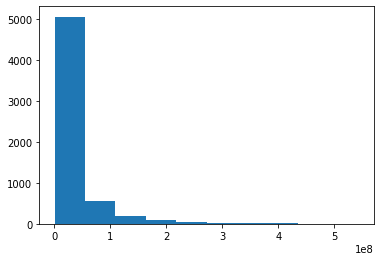

In [19]:
test, validate, train = data_split(data)
print(len(test), len(validate), len(train))
plt.figure()
n, bins, _ = plt.hist(test['gross'])
plt.figure()
n2, _, _ = plt.hist(validate['gross'], bins=bins)
plt.figure()
n3, _, _ = plt.hist(train['gross'], bins=bins)
print(sum(abs(n - n2)), sum(abs(n-n3)), sum(abs(n2-n3)))

In [8]:
pkl.dump(test, open(complete.parent / 'film_test_set.pickle','wb'))
pkl.dump(train, open(complete.parent / 'film_train_set.pickle','wb'))
pkl.dump(validate, open(complete.parent / 'film_validate_set.pickle','wb'))